# Data Visualization | Homework 3 | David Aslanyan | Python version

## Part 1

#### First we need to do the conversion of the currencies into USD

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "mobiles_dataset.csv"
df = pd.read_csv(file_path)

df["RAM"] = df["RAM"].str.extract(r'(\d+)').astype(float)

conversion_rates = {
    "Pakistan": 0.0036,
    "India": 0.011,
    "China": 0.14,
    "Dubai": 0.27,
}

df["Launched.Price.Pakistan.USD"] = df["Launched.Price.Pakistan.PKR"] * conversion_rates["Pakistan"]
df["Launched.Price.India.USD"] = df["Launched.Price.India.INR"] * conversion_rates["India"]
df["Launched.Price.China.USD"] = df["Launched.Price.China.CNY"] * conversion_rates["China"]
df["Launched.Price.Dubai.USD"] = df["Launched.Price.Dubai.AED"] * conversion_rates["Dubai"]

price_columns = [
    "Launched.Price.Pakistan.USD",
    "Launched.Price.India.USD",
    "Launched.Price.China.USD",
    "Launched.Price.USA.USD",
    "Launched.Price.Dubai.USD",
]

df["Average_Launch_Price"] = df[price_columns].mean(axis=1)

### Part 1 |  Battery Capacity vs Launched Price

#### Then we create the correlation graph to understand the correlation between Battery Capacity and Launched Price

Correlation between Battery Capacity and Price:
 Launched.Price.Pakistan.USD   -0.060913
Launched.Price.India.USD      -0.019054
Launched.Price.China.USD      -0.041043
Launched.Price.USA.USD        -0.041137
Launched.Price.Dubai.USD      -0.048908
Name: Battery.Capacity.mAh, dtype: float64


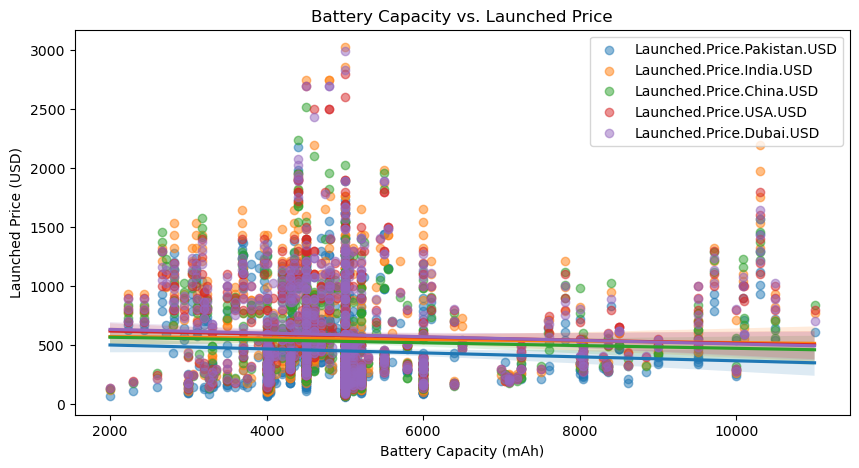

In [3]:
cor_battery = df.corr(numeric_only=True)["Battery.Capacity.mAh"][price_columns]
print("Correlation between Battery Capacity and Price:\n", cor_battery)

plt.figure(figsize=(10, 5))
for col in price_columns:
    sns.regplot(x=df["Battery.Capacity.mAh"], y=df[col], label=col, scatter_kws={"alpha": 0.5})

plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Launched Price (USD)")
plt.title("Battery Capacity vs. Launched Price")
plt.legend()
plt.show()

From this graph we understand that the correlation is very weak and we don't see any clear trend between these 2 variables, which implies that the battery capacity doesn't affect the Launch Price.

### RAM Size vs Launched Prices

#### We do the same for RAM Size and Launched Prices

Correlation between RAM and Price:
 Launched.Price.Pakistan.USD    0.408978
Launched.Price.India.USD       0.416193
Launched.Price.China.USD       0.421685
Launched.Price.USA.USD         0.461950
Launched.Price.Dubai.USD       0.473007
Name: RAM, dtype: float64


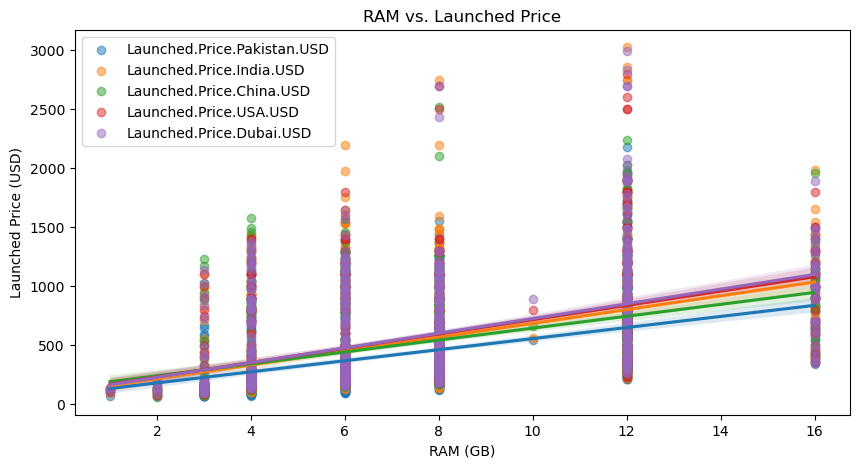

In [4]:
cor_ram = df.corr(numeric_only=True)["RAM"][price_columns]
print("Correlation between RAM and Price:\n", cor_ram)

plt.figure(figsize=(10, 5))
for col in price_columns:
    sns.regplot(x=df["RAM"], y=df[col], label=col, scatter_kws={"alpha": 0.5})

plt.xlabel("RAM (GB)")
plt.ylabel("Launched Price (USD)")
plt.title("RAM vs. Launched Price")
plt.legend()
plt.show()

From the graph we can see an okay, strongish correlation the 2 variables and also notice a positive trend. This implies that as the RAM size increases, the prices tend to rise.

### Apple products vs other products

#### Next we take a price variance data and sort it

In [7]:
df["Price_Variance"] = df[price_columns].var(axis=1)
brand_variance = df.groupby("Company.Name")["Price_Variance"].mean().sort_values(ascending=False)

print("Top 10 brands with highest price variance:\n", brand_variance.head(10))

Top 10 brands with highest price variance:
 Company.Name
Huawei     81301.539587
Sony       26610.836455
Samsung    16852.973465
Apple      15966.129411
Google     12518.534487
Vivo       12160.320668
Tecno      11627.855335
Oppo       10830.709382
Honor      10604.013959
Xiaomi      8552.541051
Name: Price_Variance, dtype: float64


From here we see that Huawei is leading the list with the highest price variance across all regions.

### Next we want to understand if all smartphones have a budget-friendly models.

In [8]:
def categorize_price(price):
    if price < 300:
        return "Budget"
    elif 300 <= price <= 700:
        return "Mid-range"
    else:
        return "Premium"

df["Price_Segment"] = df["Average_Launch_Price"].apply(categorize_price)
brand_segments = df.groupby(["Company.Name", "Price_Segment"]).size().unstack(fill_value=0)

print("Brand Segments:\n", brand_segments)

Brand Segments:
 Price_Segment  Budget  Mid-range  Premium
Company.Name                             
Apple               1          6       90
Google              0         11       10
Honor              33         35       23
Huawei              0         17       25
Infinix            43         13        0
Lenovo             10          5        0
Motorola           27         29        6
Nokia              10          0        0
OnePlus             9         29       15
Oppo               41         66       22
POCO               19         11        0
Poco                2          0        0
Realme             44         25        0
Samsung            29         14       41
Sony                0          3        6
Tecno              20         10        9
Vivo               40         37        9
Xiaomi              7         10       10
iQOO                0          3        0


From here we see that Google, Huawei, Sony and iQOO are almost not offering any Budget options, meanwhile Infinix, Honor, Oppo and Vivo are the leaders in the Budget-friendly options

### And finally we want to understand which regions offer most affortable prices on average.

In [11]:
region_avg_prices = df[price_columns].mean()
print("Average smartphone prices in regions:\n", region_avg_prices)

Average smartphone prices in regions:
 Launched.Price.Pakistan.USD    449.934239
Launched.Price.India.USD       552.823682
Launched.Price.China.USD       530.741362
Launched.Price.USA.USD         579.623784
Launched.Price.Dubai.USD       586.029016
dtype: float64


### Part 2 | Visualization

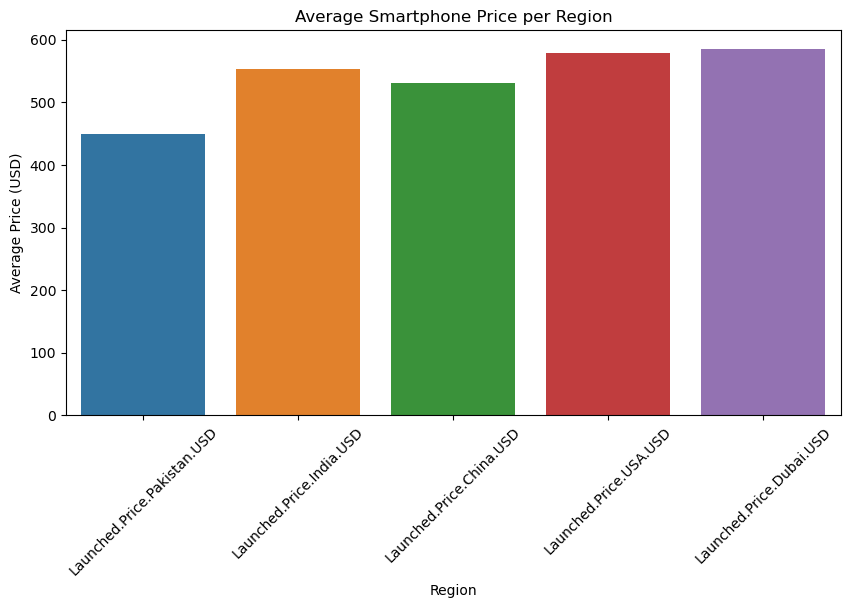

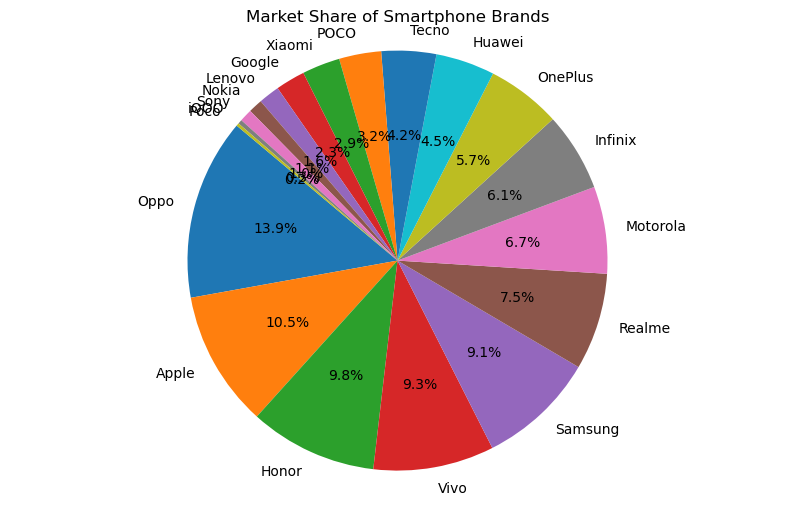

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x=region_avg_prices.index, y=region_avg_prices.values)
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title("Average Smartphone Price per Region")
plt.xticks(rotation=45)
plt.show()

brand_market_share = df["Company.Name"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(brand_market_share, labels=brand_market_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Market Share of Smartphone Brands")
plt.axis("equal")  # Ensures pie chart is circular
plt.show()


### Part 4 | Factors affecting the price

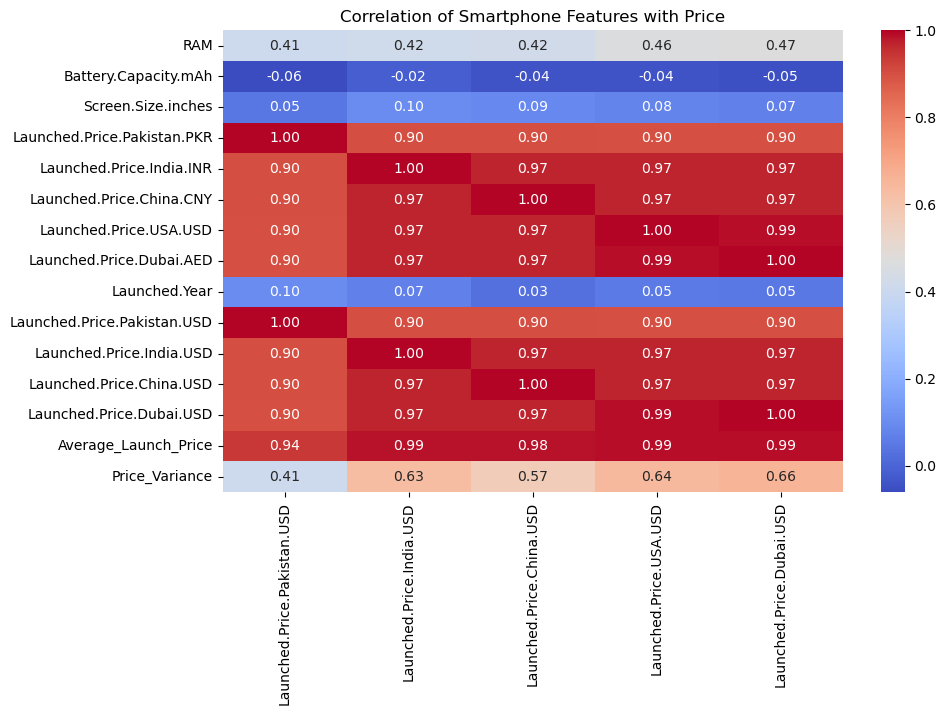

Correlation of other factors with price:
                              Launched.Price.Pakistan.USD  \
RAM                                             0.408978   
Battery.Capacity.mAh                           -0.060913   
Screen.Size.inches                              0.045831   
Launched.Price.Pakistan.PKR                     1.000000   
Launched.Price.India.INR                        0.903831   
Launched.Price.China.CNY                        0.902354   
Launched.Price.USA.USD                          0.897739   
Launched.Price.Dubai.AED                        0.898563   
Launched.Year                                   0.099566   
Launched.Price.Pakistan.USD                     1.000000   
Launched.Price.India.USD                        0.903831   
Launched.Price.China.USD                        0.902354   
Launched.Price.Dubai.USD                        0.898563   
Average_Launch_Price                            0.939085   
Price_Variance                                  0.410217  

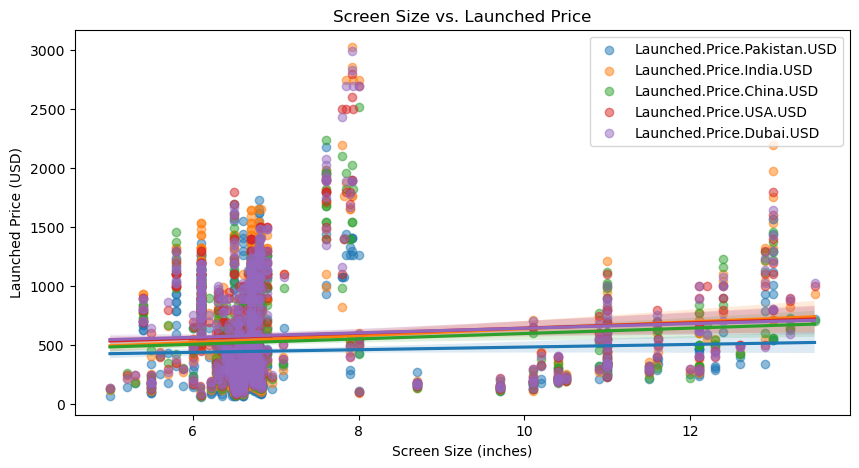

In [16]:
correlations = df.corr(numeric_only=True)[price_columns]

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Smartphone Features with Price")
plt.show()

print("Correlation of other factors with price:\n", correlations)

plt.figure(figsize=(10, 5))
for col in price_columns:
    sns.regplot(x=df["Screen.Size.inches"], y=df[col], label=col, scatter_kws={"alpha": 0.5})

plt.xlabel("Screen Size (inches)")
plt.ylabel("Launched Price (USD)")
plt.title("Screen Size vs. Launched Price")
plt.legend()
plt.show()

1. The screen size has a small impact on the prices.
2. The factors affecting prices the most are RAM size and Brand Reputation.